In [2]:
!pip install numpy pandas seaborn matplotlib sklearn

You should consider upgrading via the 'c:\python 37\python.exe -m pip install --upgrade pip' command.


# Importing Essential Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading Dataset

In [3]:
creditcard_df = pd.read_csv('Credit_Card_Bank_Data.csv')

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Null value Exploratory Analysis using heatmap

<AxesSubplot:>

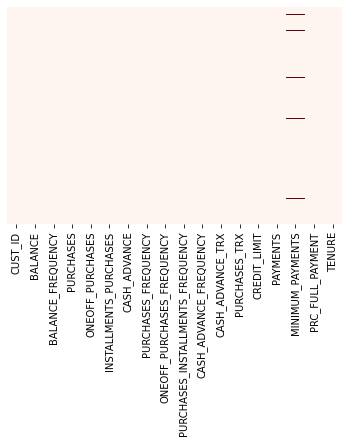

In [6]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False, cmap="Reds")

In [7]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Removing NULL values from CREDIT_LIMIT and MINIMUM_PAYMENTS

In [8]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

# Heatmap Showing Null Values Removed

<AxesSubplot:>

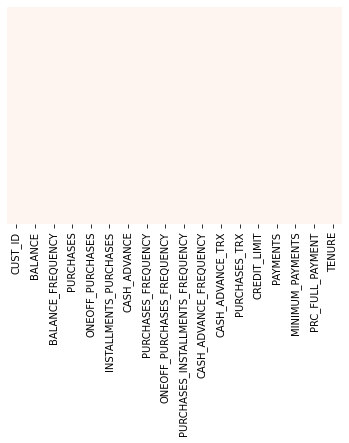

In [9]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False, cmap="Reds")

In [10]:
creditcard_df.duplicated().sum()

0

# Dropping CUST_ID Feature

In [11]:
creditcard_df.drop('CUST_ID',axis=1,inplace=True)

In [12]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Heatmap showing correlation Between any two feature taken at time

<AxesSubplot:>

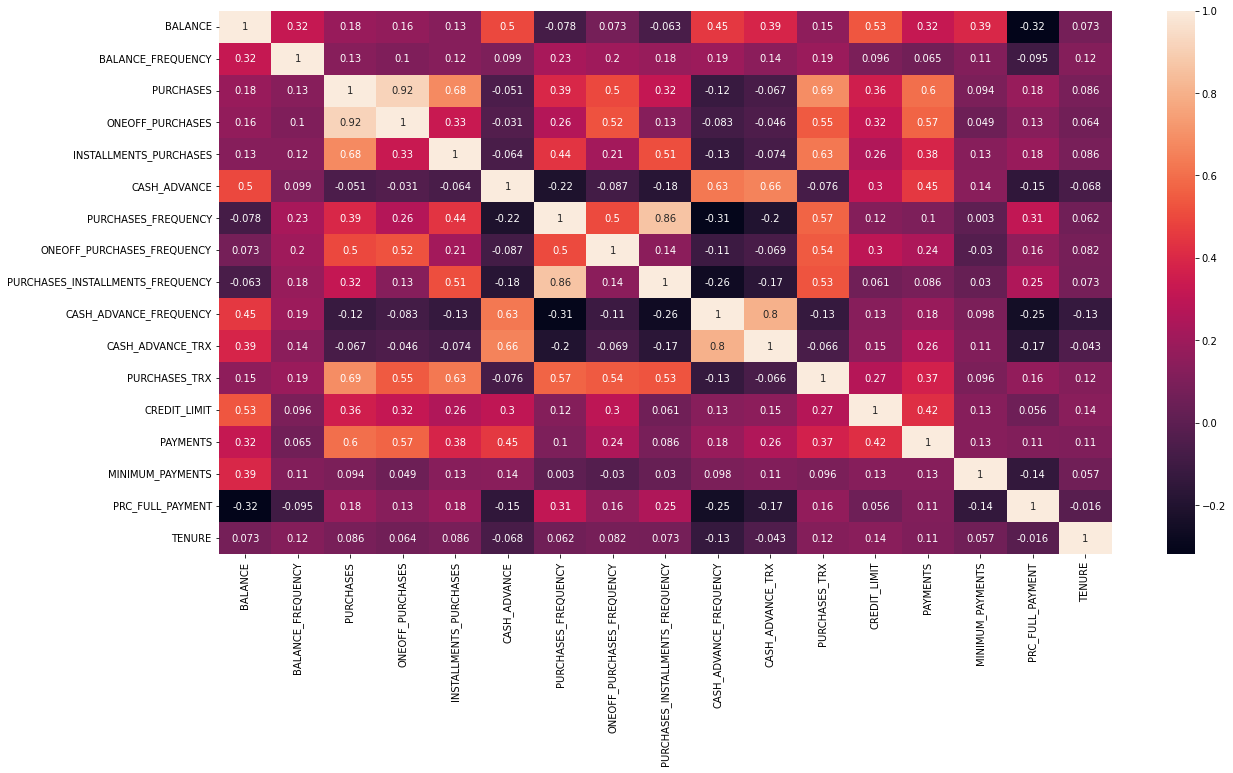

In [13]:
correlations = creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlations,annot=True)

# Normalising the dataset

In [14]:
scaler=StandardScaler()
creditcard_df_s = scaler.fit_transform(creditcard_df)

In [15]:
creditcard_df_s.shape

(8950, 17)

In [16]:
creditcard_df_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# Elbow method to find approximately correct value of k (i.e. number of clusters)

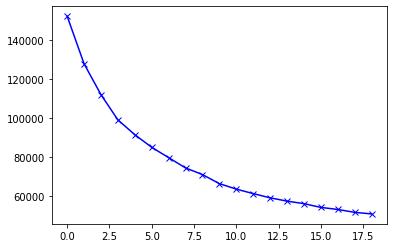

In [17]:
scores=[]
range_values=range(1,20)
for i in range_values:
    kmean = KMeans(n_clusters=i)
    kmean.fit(creditcard_df_s)
    scores.append(kmean.inertia_)
plt.plot(scores,'bx-')

# Applying Kmeans to cluster unsupervised data

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(creditcard_df_s)

kmeans.labels_= kmeans.labels_.astype(str)

# Changing Label

In [36]:
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i]=='0':
        kmeans.labels_[i]='Infrequent Purchasers'
    elif kmeans.labels_[i]=='1':
         kmeans.labels_[i]='Middle-Ground'
    elif kmeans.labels_[i]=='2':
         kmeans.labels_[i]='High Volume Purchasers'
    elif kmeans.labels_[i]=='3':
        kmeans.labels_[i]='In-Advance Frequent Payers'

# Following are the cluster centers

In [21]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns = [creditcard_df.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146
1,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
2,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
3,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744


In [22]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595


In [29]:
label=kmeans.labels_

# Assigning cluster number to each user 

In [30]:
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({'CLUSTER':label})],axis=1)
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Advance_Fre
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Middle_Grou
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,High_Volume
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,Advance_Fre
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Advance_Fre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,High_Volume
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,High_Volume
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,High_Volume
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,Advance_Fre


# Histogram of various Clusters

In [31]:
creditcard_df_cluster['CLUSTER'].unique()

array(['Advance_Fre', 'Middle_Grou', 'High_Volume', 'Infrequent_'],
      dtype=object)

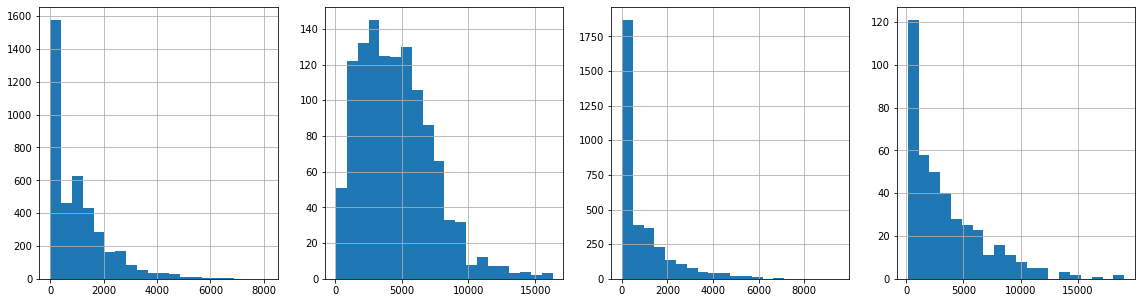

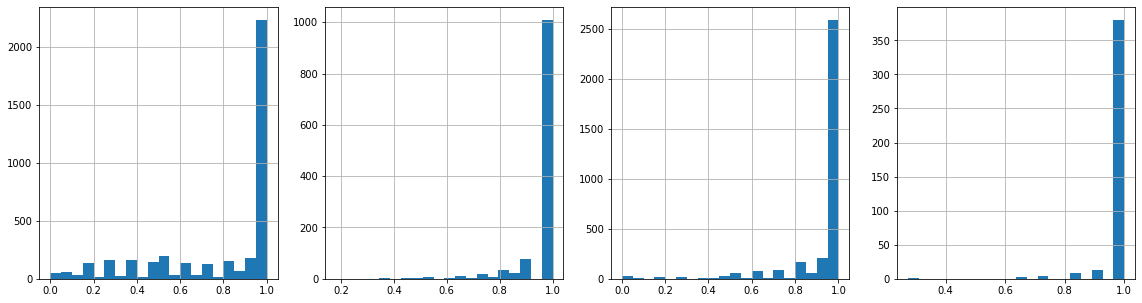

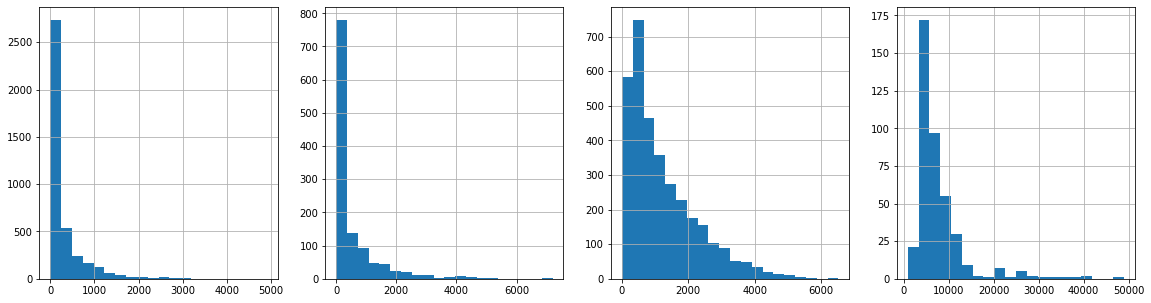

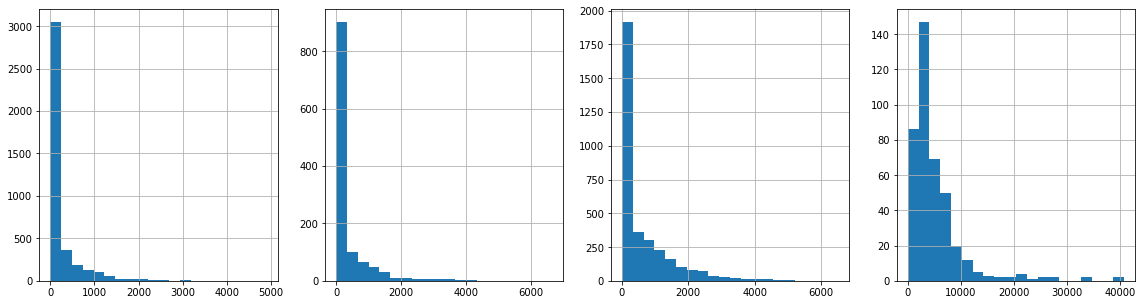

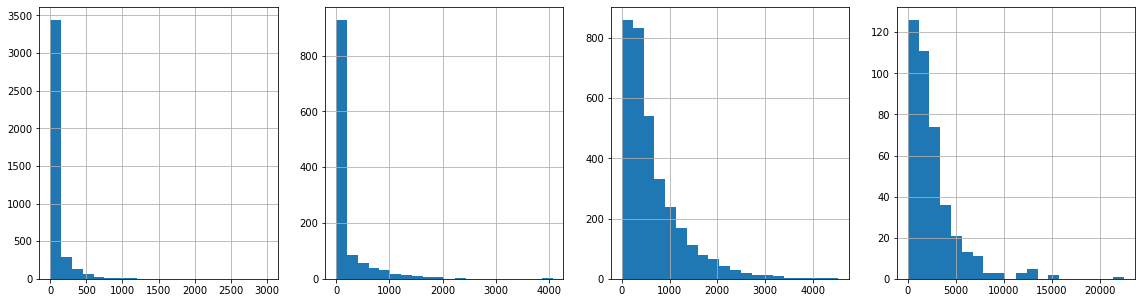

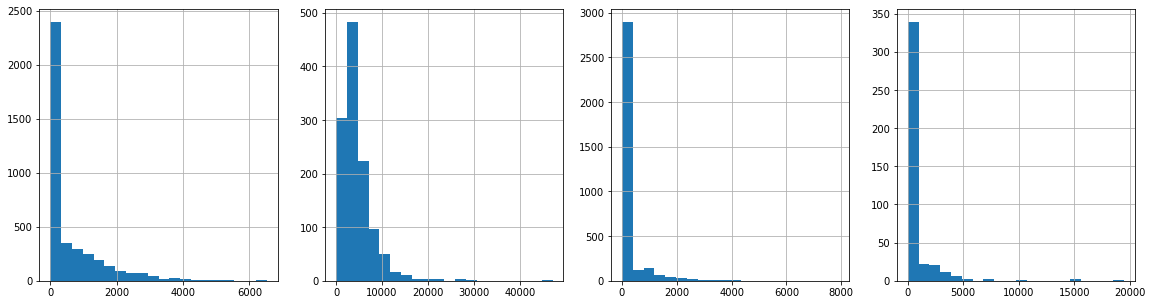

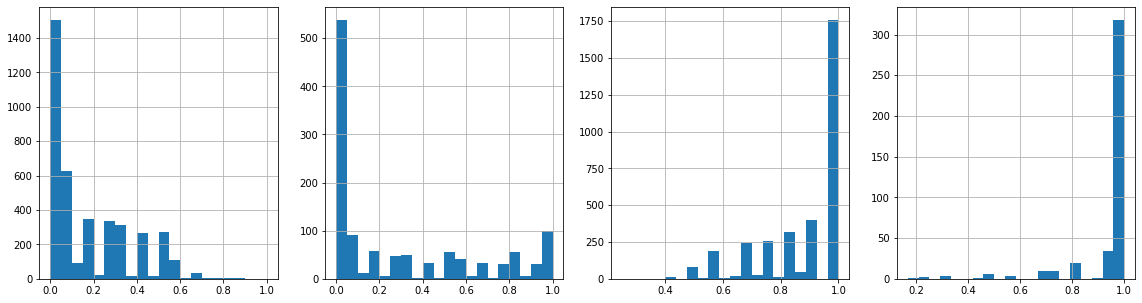

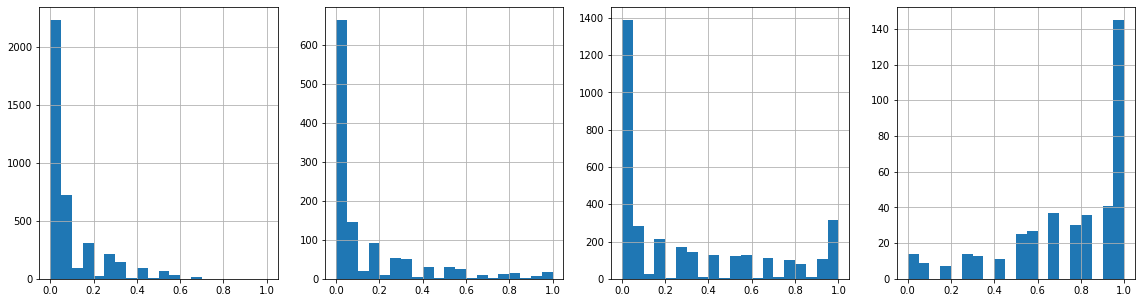

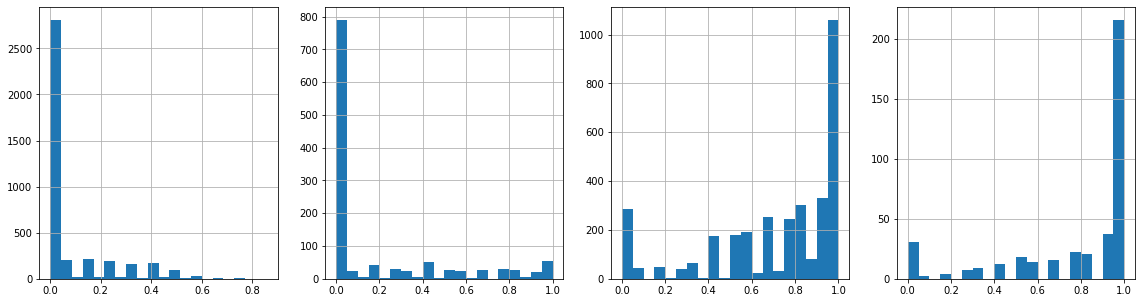

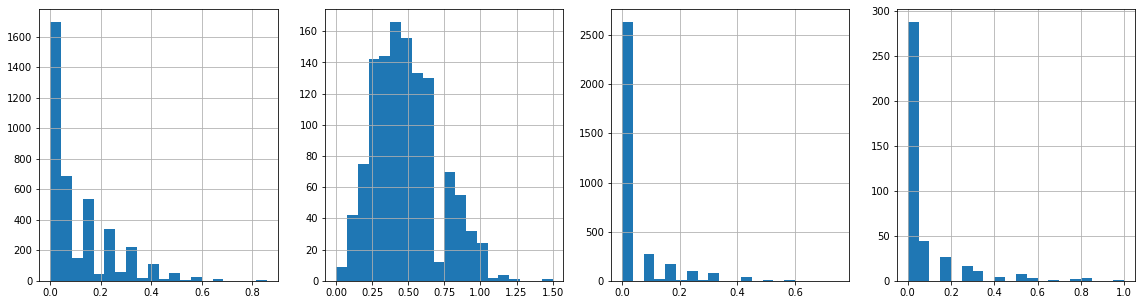

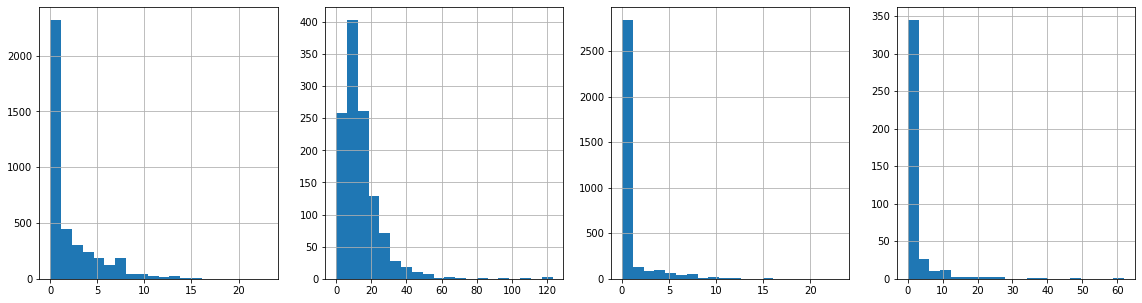

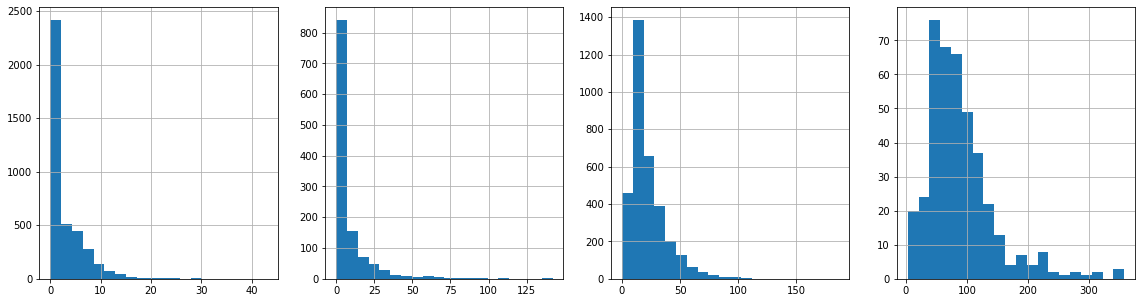

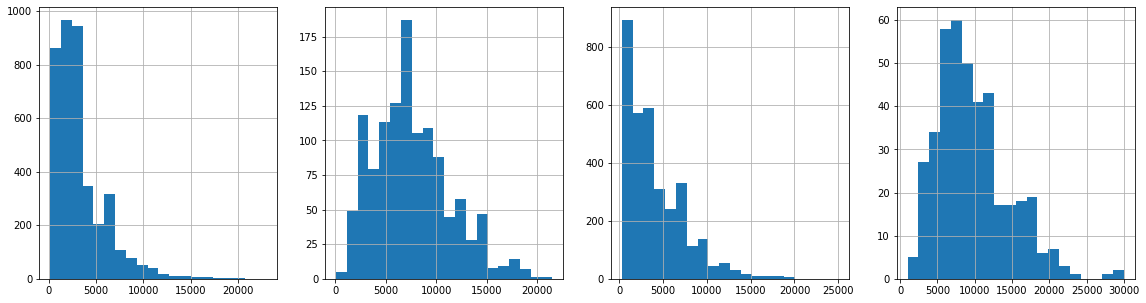

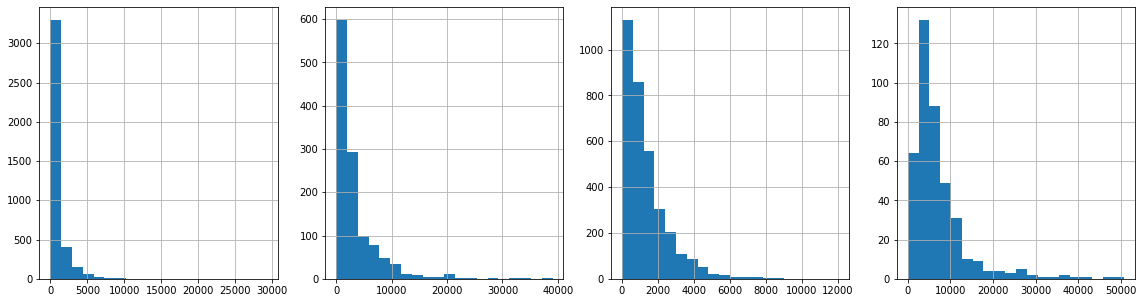

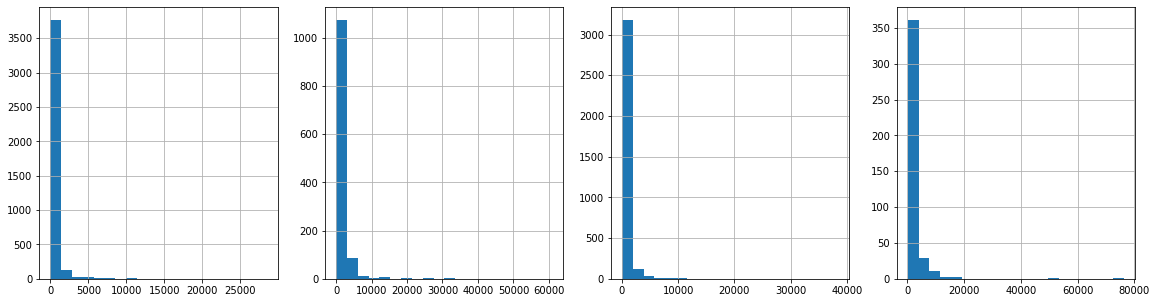

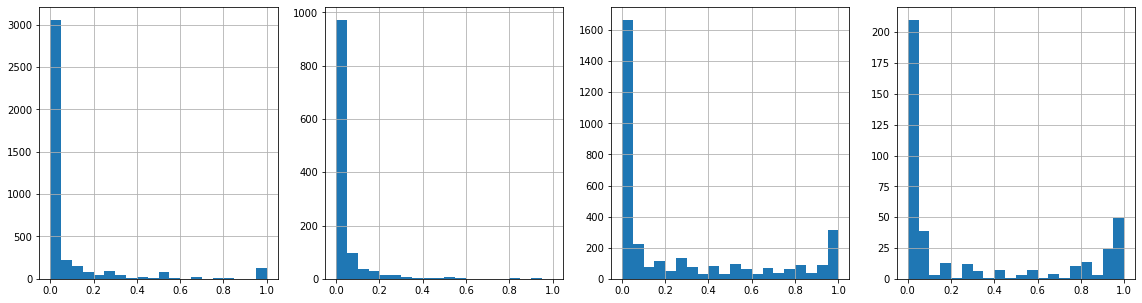

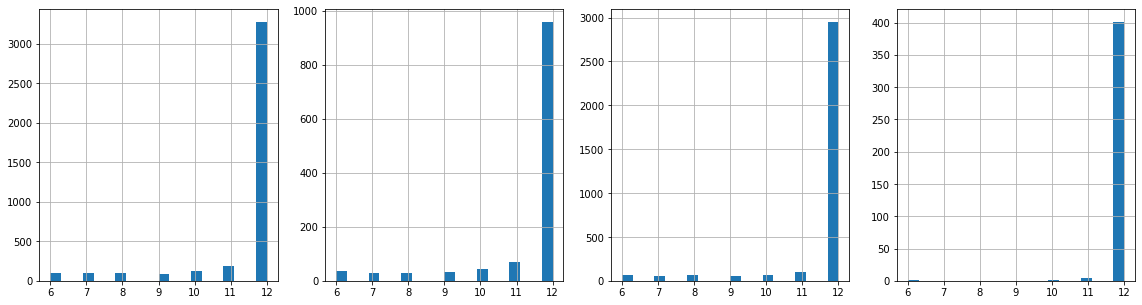

In [32]:
list_cluster=creditcard_df_cluster['CLUSTER'].unique()
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    itr=0
    for j in list_cluster:
        plt.subplot(1,7,itr+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['CLUSTER']==j]
        cluster[i].hist(bins=20)
        itr=itr+1
    plt.show()

# Applying PCA

In [33]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_s)
principal_comp

array([[-1.68221844, -1.07645712],
       [-1.13828189,  2.50639905],
       [ 0.96967538, -0.38345171],
       ...,
       [-0.92620198, -1.81080256],
       [-2.3365522 , -0.65796832],
       [-0.55642698, -0.4004458 ]])

In [34]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)
pca_df

,pca1,pca2,cluster
0,-1.682218,-1.076457,Advance_Fre
1,-1.138282,2.506399,Middle_Grou
2,0.969675,-0.383452,High_Volume
3,-0.873629,0.043193,Advance_Fre
4,-1.599432,-0.688594,Advance_Fre
...,...,...,...
8945,-0.359627,-2.016165,High_Volume
8946,-0.564372,-1.639102,High_Volume
8947,-0.926202,-1.810803,High_Volume
8948,-2.336552,-0.657968,Advance_Fre


# Final Output

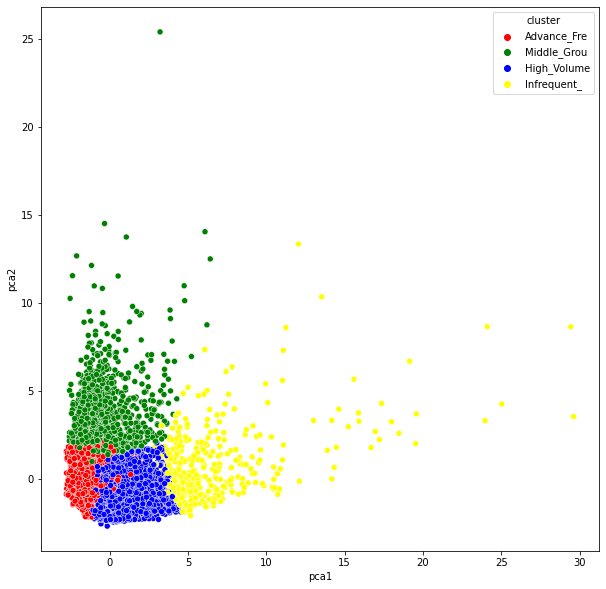

In [35]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df,palette=['red','green','blue','yellow'])
plt.show()